### Review of Numerical Differentiation

#### Q. What orders are the errors?

In [ ]:
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2. * h)

# Integration:  Chalk Board

## Numerical Integration

In [2]:
def trapezoidal(f, x_L, x_U, n):
    """
    Integrate function f from x_L to x_U using n points.
    """
    
    # Step size (or grid spacing):
    h = (x_U - x_L) / float(n)  # h is dx in our notes
    
    # Include start and end points in summation
    tot = f(x_L) + f(x_U)  

    # Loop over all the trapezoids:
    # We don't include k = 0 (x = x_L) or k = n-1 (x = x_U) because
    # they're included in the sum before the loop.
    for k in range(1, n, 1):  
        x = x_L + (k * h)
        tot += 2. * f(x)

    tot *= h/2.
    return tot

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as pl

Test case: 

$$g(x) = \tau A \cos(\tau x)$$

with $\tau=2\pi$

In [7]:
tau= 2*np.pi
g = lambda x, A=1: tau*A*np.cos(tau*x)

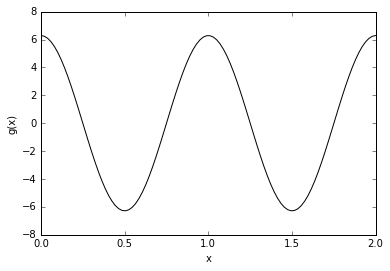

In [8]:
x = np.linspace(0, 2, 100)

pl.plot(x, g(x), color='k')
pl.xlabel('x')
pl.ylabel('g(x)')

#### Q. What should we get if we integrate from 0 to 1?

We can verify this analytically:

$\int_{x_i}^{x_f} g(x) dx = \tau A \int_{x_i}^{x_f} \cos(\tau x) dx $

Substitute $u = \tau x$, in which case $du = \tau dx$,

$$ \int_{x_i}^{x_f} g(x) dx = A \int_{\tau x_i}^{\tau x_f} \cos(u) du$$

Finally,

$$ \int_{x_i}^{x_f} g(x) dx = A \left[\sin(u) \right]_{\tau x_i}^{\tau x_f} du = A \left[\sin(\tau x_f) - sin(\tau x_i) \right]$$

For $x_i = 0$, $x_f = 1$,

$$ \int_0^1 g(x) dx = A \left[\sin(\tau) - sin(0) \right] = 0$$

In [9]:
from math import sin, pi

int_analytic = lambda A, x_i, x_f:  A * (sin(tau*x_f) - sin(tau*x_i))

In [13]:
print('Integral of g(x) from x_i=%g to x_f=%g is %g ' \
    % (0., 0.2, int_analytic(1., 0., 0.2)))

Integral of g(x) from x_i=0 to x_f=0.2 is 0.951057 


In [14]:
x_L = 0.
x_U = 0.2
n = 5
print('Approximate integral is %g' % trapezoidal(g, x_L, x_U, n))

Approximate integral is 0.946045


How about from $x_i=0$ to $x_f=0.2$?

#### Q. Before we do this, do you expect the trapezoidal sum version of the integral to be an overestimate or an underestimate? Hint: see figure below.

(0, 0.2)

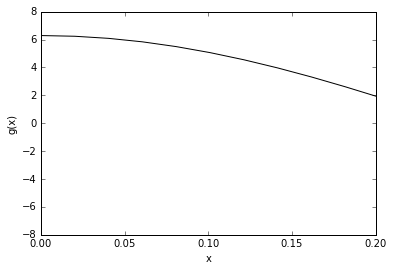

In [15]:
A = 1.0
pl.figure()
pl.plot(x, g(x, A=A), color='k')
pl.xlabel('x')
pl.ylabel('g(x)')
pl.xlim(0, 0.2)

In [16]:
print('Analytic integral is %g' % int_analytic(A, 0.0, 0.2))
print('Approximate integral is %g' \
    % trapezoidal(lambda x: g(x, A=A), 0.0, 0.2, 5))

Analytic integral is 0.951057
Approximate integral is 0.946045


#### Q. How can we improve the accuracy of this numerical integral?

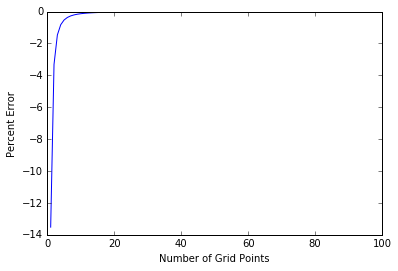

In [17]:
n = 100        # Max number of grid points

x_L = 0.0      # limits of integration
x_U = 0.2

# Grid point and integral approximation arrays
n_grid = np.arange(1, n)  # Starts with 1:  need at least one trapezoid.
approx = np.zeros(n-1)

# Loop over all n starting with n = 1 (n_grid[0] = 1):
for i in range(n-1):
    integral = trapezoidal(g, x_L, x_U, n_grid[i])
    approx[i] = integral

# Compute relative error in percent
error = 100 * (approx - int_analytic(1., x_L, x_U)) / int_analytic(1., x_L, x_U)

# Plot results
pl.figure()
pl.plot(n_grid, error)
pl.xlabel('Number of Grid Points')
pl.ylabel('Percent Error')

#### Q. How many grid points do you expect to reach 1% accuracy?

#### Q. 1% accuracy? 0.1%?

#### Expanding the y-axis using logarithm

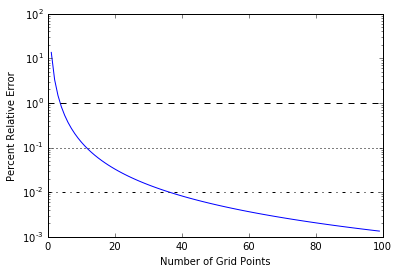

In [18]:
error_abs = np.abs(error)  # absolute value of the error

pl.semilogy(n_grid, error_abs) 
pl.xlabel('Number of Grid Points')
pl.ylabel('Percent Relative Error')

# Plot straight lines corresponding to 1% and 10% error
pl.axhline(y=1, color='k', ls='--')
pl.axhline(y=1e-1, color='k', ls=':')
pl.axhline(y=1e-2, color='k', ls='-.')

#### Q. How could we find the number of grid points required to achieve 0.01% accuracy more precisely than the visual approach above?

0.000154120202821


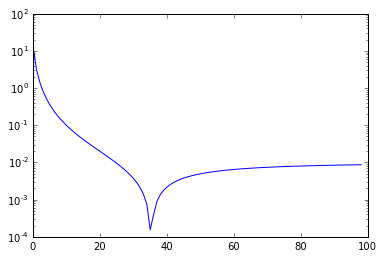

In [19]:
# location of point closest to 0.01% error
i = np.abs(error_abs - 0.01).argmin() # This yields the index of the point
print(np.abs(error_abs - 0.01).min()) # This prints the point closest to 0.01%.
pl.semilogy(np.abs(error_abs - 0.01))

In [20]:
print(i, n_grid[i], error_abs[i])

35 36 0.0101541202028


#### Q. Are there any downsides to letting n be very large?